In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor  # DecisionTree model is used from sklearn. This leads to an increase in accuracy (here 100%).
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # These matrices are used as we have regression matrix with the parameters for evaluation or calculation.
from sklearn.preprocessing import LabelEncoder

In [3]:
Housing_Data = pd.read_csv("Housing (1).csv")

In [4]:
Housing_Data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [5]:
Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
# Encode all the non numeric data
# enc = LabelEncoder()
Housing_Data['mainroad'] = LabelEncoder().fit_transform(Housing_Data['mainroad'])
Housing_Data['guestroom'] = LabelEncoder().fit_transform(Housing_Data['guestroom'])
Housing_Data['basement'] = LabelEncoder().fit_transform(Housing_Data['basement'])
Housing_Data['hotwaterheating'] = LabelEncoder().fit_transform(Housing_Data['hotwaterheating'])
Housing_Data['airconditioning'] = LabelEncoder().fit_transform(Housing_Data['airconditioning'])
Housing_Data['prefarea'] = LabelEncoder().fit_transform(Housing_Data['prefarea'])
Housing_Data['furnishingstatus'] = LabelEncoder().fit_transform(Housing_Data['furnishingstatus'])

In [7]:
Housing_Data.shape

(545, 13)

In [8]:
Housing_Data.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


In [9]:
features = Housing_Data.drop("price", axis=1)
price = Housing_Data["price"]

In [10]:
features.head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1


In [11]:
price.head(3)

0    13300000
1    12250000
2    12250000
Name: price, dtype: int64

In [12]:
# Split the data
features_train, features_test, price_train, price_test = train_test_split(features, price, 
                                                                            test_size=0.2, random_state=42)

In [13]:
model = DecisionTreeRegressor()

In [14]:
model.fit(features, price)

DecisionTreeRegressor()

In [15]:
price_pred = model.predict(features_test)

In [16]:
# MAE MSE and R2 Calculations
mae = mean_absolute_error(price_test, price_pred)
mse = mean_squared_error(price_test, price_pred)
r2 = r2_score(price_test, price_pred)
accuracy = model.score(features_test, price_test)
print(f'Accuracy Score: {accuracy*100:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R²) Score: {r2:.2f}')

Accuracy Score: 100.00
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R-squared (R²) Score: 1.00


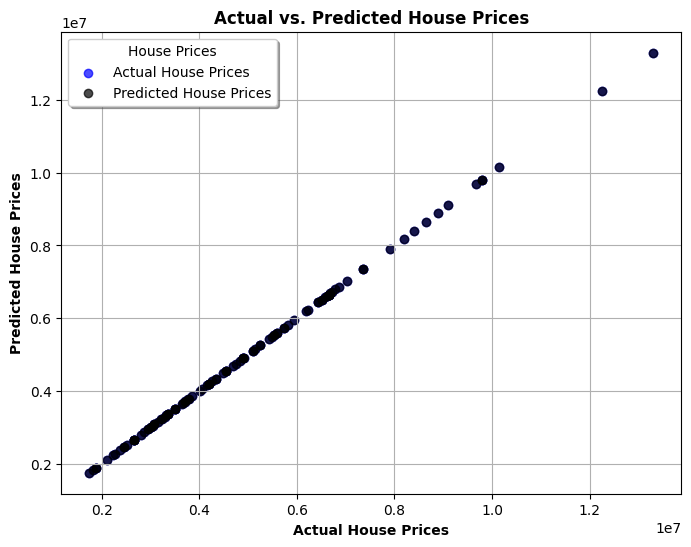

In [17]:
#Visualization
plt.figure(figsize=(8, 6))
plt.scatter(price_test, price_test, color='blue', alpha=0.7, label='Actual House Prices')
plt.scatter(price_test, price_pred, color='black', alpha=0.7, label='Predicted House Prices')
plt.xlabel('Actual House Prices', weight='bold')
plt.ylabel('Predicted House Prices', weight='bold')
plt.title('Actual vs. Predicted House Prices', weight='bold')
plt.grid(True)
plt.legend(loc = 'upper left', title='House Prices', shadow=True)
plt.show()